In [1]:
import os
from bs4 import BeautifulSoup
import random
import spacy
import pandas as pd
from utils.input_utils.text_extraction import extract_from_file


nlp = spacy.load("en_core_web_lg")
raw = os.path.abspath("../data/no_problem/")
amount_of_docs = 5

In [9]:

files = []
directories = []

for r, d, f in os.walk(raw, followlinks=True):

    for directory in d:
        directories.append(os.path.join(r, directory))
    for file in f:
        if ".html" in file:
            files.append(os.path.join(r, file))

SEED = 43



In [3]:
def get_keywords(path):
    
    with open(path, "rt") as file:
        keywords = []
        
        soup = BeautifulSoup(file.read(), features="html.parser")
        keyword_tag=soup.find('meta', attrs={"name": "keywords"}) 
        
        if keyword_tag:
            doc = nlp(keyword_tag['content'].lower().replace("\n", " "))

            for token in doc:
                if not token.is_punct:
                    keywords.append(token.text)
                
    return keywords

In [7]:
from utils.output_utils.create_df_from_doc import create_df_from_doc
from pipeline.create_pipeline import create_pipeline


pipeline = create_pipeline()

def process_document(path):
    keywords = get_keywords(path)
    print(keywords)
    
    if len(keywords)>0:    
        text = extract_from_file(path)
        doc = pipeline(text)
        print("1")
        df = create_df_from_doc(doc)
        print("2")
  
        return df[df['token'].astype("string").isin(keywords)]
    return None
    

In [10]:
docs=0

random.seed(SEED)
result_dfs = []
while docs < amount_of_docs:
    try:
        filepath = random.sample(files, 1)[0]
    except:
        break
    
    df = process_document(filepath)
    print(df)
    if df is not None:
        docs+=1
        result_dfs.append(df)
    

[]
None
[]
None
[]
None
[]
None
[]
None
[]
None
['transition', 'metal', 'dichalcogenides', ' ', 'molybdenum', 'disulfide', ' ', 'van', 'der', 'waals', 'heterostructure', ' ', 'photoluminescence', 'spectroscopy', ' ', 'quantum', 'confined', 'stark', 'effect', ' ', 'exciton', 'polarizability']
3880 overall words
1
2
                 token              lemma  appearance  difficulty  \
60      polarizability     polarizability           6        6.64   
17     heterostructure    heterostructure           4        6.77   
159  photoluminescence  photoluminescence           5        6.60   
25           disulfide          disulfide           3        5.43   
24          molybdenum         molybdenum           5        5.07   
1             confined            confine           8        5.00   
59        spectroscopy       spectroscopy           2        4.91   
2                stark              stark          15        4.04   
0              quantum            quantum          13        3.

/Users/bockstaller/code/vocabulary-extraction/src/pipeline/pipeline_components/pipe_keywords.py:23: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  kw_score = token.similarity(kw)


1
2
        token     lemma  appearance  difficulty  rel. frequency  cluster  \
3        path      path          62        3.26        0.676417      NaN   
6    planning  planning          29        3.11        0.479419      NaN   
55          g         g          21        3.02        0.389559      NaN   
4    planning      plan           7        2.73        0.024502      NaN   
269    mmwave    mmwave           3        8.00             NaN      NaN   

     keyword score   ranking  \
3         0.838490  0.217477   
6         0.582073  0.204104   
55        0.375617  0.196656   
4         0.582073  0.171122   
269       0.000000       NaN   

                                        example phrase  
3    cellular coverage-aware path planning for uavs...  
6    the first path planning method, likely the mos...  
55   in the case of 4g, the 1.8 ghz band is used by...  
4    the first path planning method, likely the mos...  
269                5: cdf of the sinr of mmwave 5g.     
[]
N

/Users/bockstaller/code/vocabulary-extraction/src/pipeline/pipeline_components/pipe_keywords.py:23: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  kw_score = token.similarity(kw)


1
2
           token         lemma  appearance  difficulty  rel. frequency  \
2         cosmic        cosmic          76        4.21        7.261288   
41  astronomical  astronomical           7        4.50        1.736792   
32     detection     detection          16        3.95        2.560123   
48     reduction     reduction           2        3.54        0.015556   
6         images         image          63        3.01        0.458569   

    cluster  keyword score   ranking  \
2       NaN       0.480549  0.302282   
41      NaN       1.000000  0.290616   
32      NaN       1.000000  0.260681   
48      NaN       0.539139  0.221334   
6       NaN       0.504545  0.190598   

                                       example phrase  
2        cosmic rays are often multiple-pixel events.  
41                               astronomical images:  
32  the result for the spectrum with the readout a...  
48  therefore we suggest to make bad pixel correct...  
6                             

/Users/bockstaller/code/vocabulary-extraction/src/pipeline/pipeline_components/pipe_keywords.py:23: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  kw_score = token.similarity(kw)


1
2
            token          lemma  appearance  difficulty  rel. frequency  \
74  circumstellar  circumstellar           1        6.48        0.163389   
73      accretion      accretion          50        5.21        3.506104   
4           disks           disk         272        3.88        0.163884   
79       sequence       sequence           1        3.68        0.000259   
76      formation      formation           7        3.49        0.008179   
77            pre            pre           1        3.06        0.000062   
12          stars           star          39        2.89        0.016770   
78           main           main           8        2.72        0.001812   
75         matter         matter           2        2.63        0.000092   

    cluster  keyword score   ranking  \
74      NaN       0.469653  0.406280   
73      NaN       1.000000  0.353097   
4       NaN       1.000000  0.243784   
79      NaN       0.582832  0.230002   
76      NaN       1.000000  0.21818

/Users/bockstaller/code/vocabulary-extraction/src/pipeline/pipeline_components/pipe_keywords.py:23: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  kw_score = token.similarity(kw)


1
2
         token      lemma  appearance  difficulty  rel. frequency  cluster  \
61        data      datum           6        5.30        3.630279      NaN   
60         ism        ism           2        4.90        0.160385      NaN   
33   molecules   molecule          27        4.37        4.732682      NaN   
19   molecular  molecular           5        3.97        0.118041      NaN   
62   processes    process           1        2.72        0.000265      NaN   
278       data       data           2        2.69        0.000991      NaN   

     keyword score   ranking  \
61        1.000000  0.340489   
60        0.259866  0.306658   
33        1.000000  0.285169   
19        0.724709  0.248425   
62        0.573204  0.170001   
278       1.000000  0.168128   

                                        example phrase  
61   the data are smoothed using a gaussian filter ...  
60   subject headings:astrochemistry – ism: abundan...  
33   as long as this morphology and composition are..

In [23]:
merged = pd.concat(result_dfs).reset_index()
merged



,index,token,lemma,appearance,difficulty,rel. frequency,cluster,keyword score,ranking,example phrase
0,60,polarizability,polarizability,6,6.64,104.424780,NaN,1.000000,0.571026,"(2013), an exciton polarizability of is deduc..."
1,17,heterostructure,heterostructure,4,6.77,62.518365,NaN,1.000000,0.516537,this built-in electric field arises from space...
2,159,photoluminescence,photoluminescence,5,6.60,66.161118,NaN,1.000000,0.511355,(c) ratio between the integrated intensity of ...
3,25,disulfide,disulfide,3,5.43,1.607075,NaN,0.525194,0.341776,"(2010), such as molybdenum disulfide (mos), an..."
4,24,molybdenum,molybdenum,5,5.07,1.951403,NaN,1.000000,0.319791,"(2010), such as molybdenum disulfide (mos), an..."
5,1,confined,confine,8,5.00,4.251249,NaN,0.652621,0.318852,a crucial property of a confined exciton is th...
6,59,spectroscopy,spectroscopy,2,4.91,0.216019,NaN,1.000000,0.307198,"j. klein, j. wierzbowski, a. regler, j. becker..."
7,2,stark,stark,15,4.04,1.638793,NaN,0.371103,0.254949,stark shift as a function of the applied elect...
8,0,quantum,quantum,13,3.98,1.069138,NaN,0.599771,0.250347,"/alas quantum wells,” phys."
9,11,transition,transition,5,3.55,0.058888,NaN,0.579830,0.221963,"g. pedersen, “exciton stark shift and electroa..."


In [24]:
relevancy = merged.loc[:,'keyword score']
relevancy

0     1.000000
1     1.000000
2     1.000000
3     0.525194
4     1.000000
5     0.652621
6     1.000000
7     0.371103
8     0.599771
9     0.579830
10    1.000000
11    0.812346
12    0.000000
13    0.838490
14    0.582073
15    0.375617
16    0.582073
17    0.000000
18    0.480549
19    1.000000
20    1.000000
21    0.539139
22    0.504545
23    0.469653
24    1.000000
25    1.000000
26    0.582832
27    1.000000
28    0.323420
29    1.000000
30    1.000000
31    0.662209
32    1.000000
33    0.259866
34    1.000000
35    0.724709
36    0.573204
37    1.000000
Name: keyword score, dtype: float64

In [26]:
relevancy.mean()

0.7115589623388491

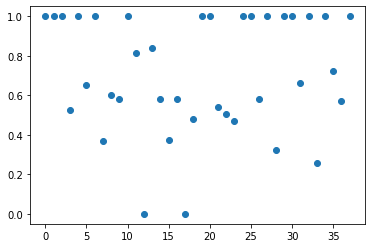

In [28]:
import matplotlib.pyplot as plt
plt.scatter(relevancy.index, relevancy)
plt.show()